# Exploring Housing Data with Regression Analysis: A Deep Dive into Home Values

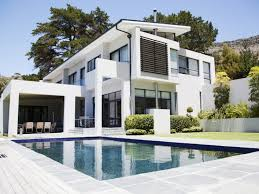

## Introduction

In today's blog, we dive deep into an exciting regression analysis using data from the 2004 American Housing Survey. This dataset includes various factors like home values, demographics, neighborhood characteristics, and more. In particular, we focus on the relationships between home features, such as the number of bedrooms and bathrooms, and house prices, as well as a logistic regression model examining down payments for first-time homebuyers.

Let’s explore how we can use regression to understand the impact of these factors on house prices and down payments.

## Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

homes = pd.read_csv(
  'https://bcdanl.github.io/data/american_housing_survey.csv'
)
homes.head()

,LPRICE,VALUE,STATE,METRO,ZINC2,HHGRAD,BATHS,BEDRMS,PER,ZADULT,...,EABAN,HOWH,HOWN,ODORA,STRNA,AMMORT,INTW,MATBUY,DWNPAY,FRSTHO
0,85000,150000,GA,rural,15600,No HS,2,3,1,1,...,0,good,good,0,0,50000,9,1,other,0
1,76500,130000,GA,rural,61001,HS Grad,2,3,5,2,...,0,good,bad,0,1,70000,5,1,other,1
2,93900,135000,GA,rural,38700,HS Grad,2,3,4,2,...,0,good,good,0,0,117000,6,0,other,1
3,100000,140000,GA,rural,80000,No HS,3,4,2,2,...,0,good,good,0,1,100000,7,1,prev home,0
4,100000,135000,GA,rural,61000,HS Grad,2,3,2,2,...,0,good,good,0,0,100000,4,1,other,1


## Relationships

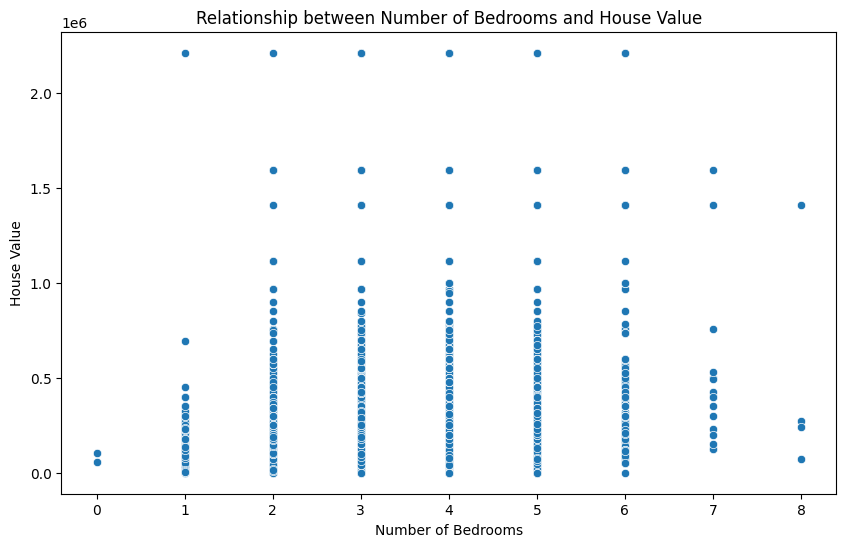

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BEDRMS', y='VALUE', data=homes)
plt.title('Relationship between Number of Bedrooms and House Value')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Value')
plt.show()


- As expected, there's a general trend showing that houses with more bedrooms tend to have higher values. However, there's significant variability, indicating other factors also play a role.


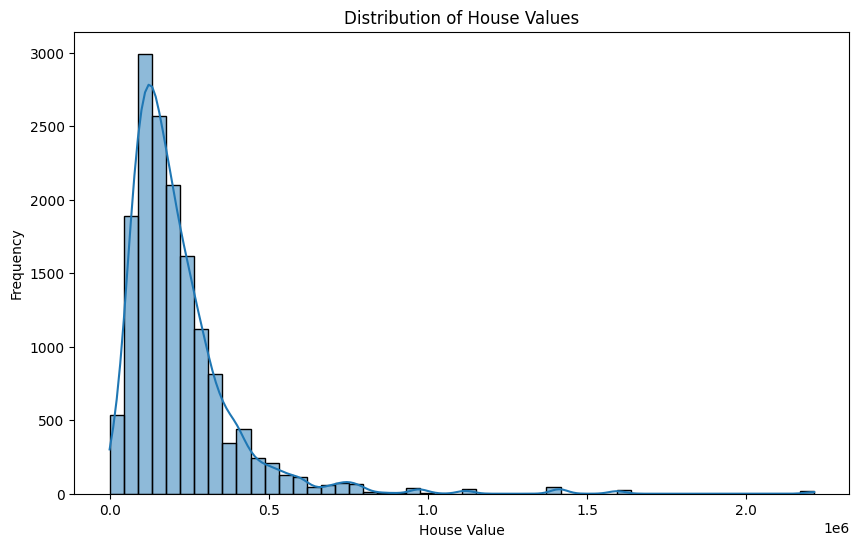

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(homes['VALUE'], bins=50, kde=True)
plt.title('Distribution of House Values')
plt.xlabel('House Value')
plt.ylabel('Frequency')
plt.show()

The distribution of house values is right-skewed, indicating that there are many lower-valued homes and a smaller number of very high-valued homes. This is typical in real estate markets.


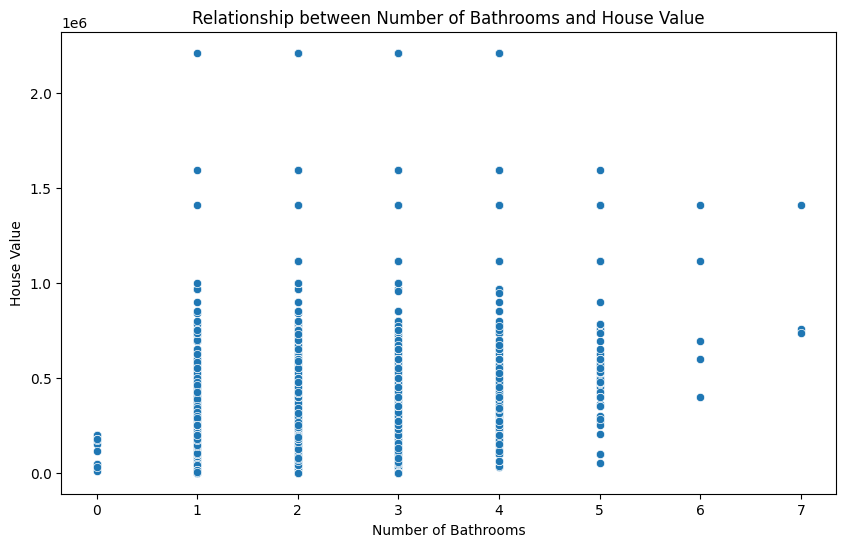

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='BATHS', y='VALUE', data=homes)
plt.title('Relationship between Number of Bathrooms and House Value')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Value')
plt.show()

Similar to bedrooms, the number of bathrooms positively correlates with house value. The more bathrooms, the more valuable the house tends to be.


## Linear Regression Model

- Fit a linear regression model with the following specifications:
  - Outcome variable: log(VALUE)
  - Predictors: all but AMORT and LPRICE

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

homes_copy = homes.copy()

homes_copy = homes_copy.dropna(subset=['VALUE', 'AMMORT', 'LPRICE'])

homes_copy['log_VALUE'] = np.log(homes_copy['VALUE'])

categorical_cols = homes_copy.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with LinearRegression
encoded_data = encoder.fit_transform(homes_copy[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

homes_copy = homes_copy.drop(columns=categorical_cols)
homes_copy = pd.concat([homes_copy, encoded_df], axis=1)

predictors = [col for col in homes_copy.columns if col not in ['AMMORT', 'LPRICE', 'VALUE','log_VALUE']]

X = homes_copy[predictors]
y = homes_copy['log_VALUE']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
model.intercept_


[ 6.24368078e-07  2.11688048e-01  8.74019493e-02  9.65115807e-03
 -1.86439843e-02 -9.32413595e-04 -4.34737453e-02 -2.56800854e-02
 -8.64473930e-02  9.39133675e-03 -1.26476483e-01  2.86960819e-02
  2.94471054e-01 -1.51545979e-02 -1.62135211e-01  1.02559846e-02
 -3.61815653e-02 -4.63687515e-02 -2.96611588e-02 -8.39847366e-02
  6.17984043e-01  3.25853542e-01  2.71615116e-01 -3.70717924e-02
 -2.43773279e-01 -1.61255350e-01 -1.01567117e-01 -4.64994801e-02
 -5.56818280e-02 -3.80200590e-01 -2.53658960e-01 -4.30915507e-01
  4.95171204e-01 -4.30521312e-02  4.30521312e-02 -1.48478092e-02
  1.17280711e-01  1.82412176e-01 -7.54623696e-02 -2.09382709e-01
 -6.47717629e-02  6.47717629e-02 -5.96320624e-02  5.96320624e-02
 -6.04477439e-02  6.04477439e-02]


np.float64(11.219066790661115)

## Linear Regression Refit

- Refit the linear regression model, retaining only statistically significant predictors from Question 1.
- Compare the revised model to the initial model from Question 2 using:
  - B estimates
  - R^2
  - RMSE
  - Residual plots

                            OLS Regression Results                            
Dep. Variable:              log_VALUE   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:39:27   Log-Likelihood:                -18921.
No. Observations:               15565   AIC:                         3.792e+04
Df Residuals:                   15524   BIC:                         3.824e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4237      0.016  

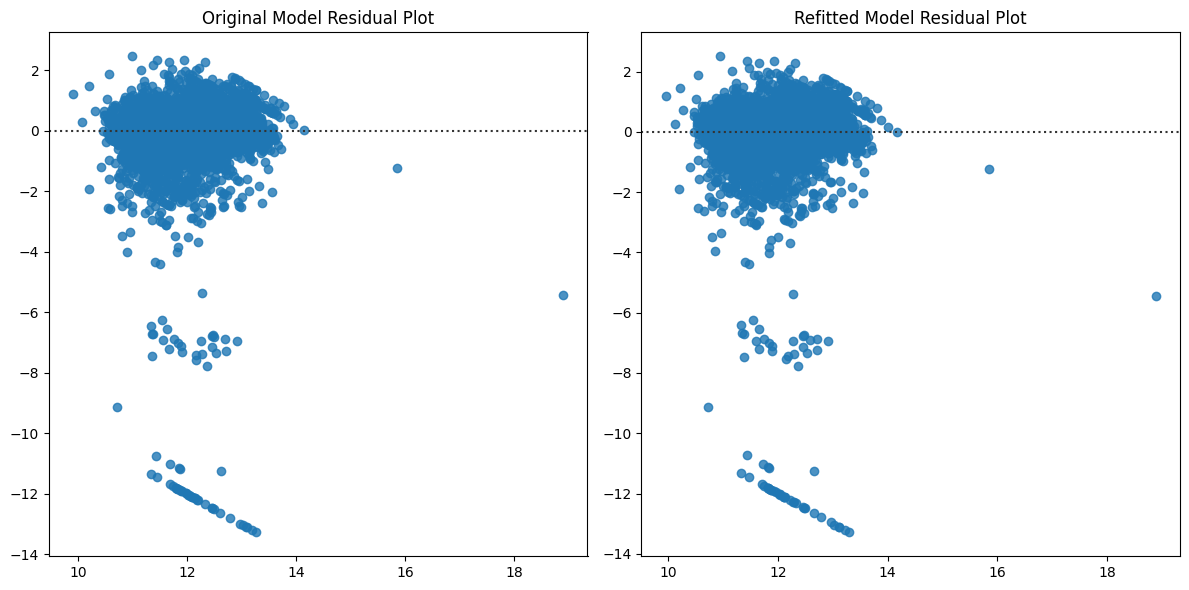

In [4]:


import matplotlib.pyplot as plt
import statsmodels.api as sm

X = sm.add_constant(X)

model_sm = sm.OLS(y, X).fit()

print(model_sm.summary())

significant_predictors = [predictor for predictor, p_value in zip(X.columns, model_sm.pvalues) if p_value < 0.05]
print("Significant predictors:", significant_predictors)


X_significant = X[significant_predictors]
model_significant = sm.OLS(y, X_significant).fit()

print(model_significant.summary())


from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


print("\nOriginal Model Coefficients:")
print(model_sm.params)

print("\nRefitted Model Coefficients:")
print(model_significant.params)



print("\nOriginal Model R-squared:", model_sm.rsquared)
print("Refitted Model R-squared:", model_significant.rsquared)

print("\nOriginal Model RMSE:", np.sqrt(mean_squared_error(y, model_sm.predict(X))))
print("Refitted Model RMSE:", np.sqrt(mean_squared_error(y, model_significant.predict(X_significant))))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.residplot(x=model_sm.fittedvalues, y=model_sm.resid)
plt.title('Original Model Residual Plot')

plt.subplot(1, 2, 2)
sns.residplot(x=model_significant.fittedvalues, y=model_significant.resid)
plt.title('Refitted Model Residual Plot')

plt.tight_layout()
plt.show()


## Fit a Logistic Regression Model

- Fit a logistic regression model with the following specifications:

  - Outcome variable:
 (indicating whether the buyer made a down payment of 20% or more)
  - Predictors: All available variables except AMORT and LPRICE

- The outcome variable is defined as:
  \begin{align}
  \text{GT20DWN} \,=\,\begin{cases}
  1 & \text{if}\; \frac{\text{LPRICE} - \text{AMMORT}}{\text{LPRICE}} > 0.2 \\
  0 & \text{otherwise}
  \end{cases}
  \end{align}


- Analyze and interpret the following relationships:

- The association between first-time homeownership (
) and the probability of making a 20%+ down payment.

- The association between number of bedrooms (
) and the probability of making a 20%+ down payment.



In [5]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

homes['GT20DWN'] = np.where((homes['LPRICE'] - homes['AMMORT']) / homes['LPRICE'] > 0.2, 1, 0)

homes_logreg = homes.copy()
homes_logreg = homes_logreg.dropna(subset=['LPRICE', 'AMMORT', 'BEDRMS', 'FRSTHO'])
predictors = [col for col in homes_logreg.columns if col not in ['AMMORT', 'LPRICE', 'GT20DWN']]

X_logreg = homes_logreg[predictors]
y_logreg = homes_logreg['GT20DWN']

categorical_cols_logreg = X_logreg.select_dtypes(include=['object']).columns
encoder_logreg = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_logreg = encoder_logreg.fit_transform(X_logreg[categorical_cols_logreg])
encoded_df_logreg = pd.DataFrame(encoded_data_logreg, columns=encoder_logreg.get_feature_names_out(categorical_cols_logreg))
X_logreg = X_logreg.drop(columns=categorical_cols_logreg)
X_logreg = pd.concat([X_logreg, encoded_df_logreg], axis=1)


model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_logreg, y_logreg)


print(model_logreg.coef_)


first_home_coef = 0
try:
  first_home_index = X_logreg.columns.get_loc("FIRSTHOME_Yes")
  first_home_coef = model_logreg.coef_[0][first_home_index]
  print(f"Coefficient for FIRSTHOME: {first_home_coef}")
except KeyError:
  print("FIRSTHOME column not found after encoding or name has changed")


bedrms_coef = 0
try:
    bedrms_index = X_logreg.columns.get_loc("BEDRMS")
    bedrms_coef = model_logreg.coef_[0][bedrms_index]
    print(f"Coefficient for BEDRMS: {bedrms_coef}")
except KeyError:
    print("BEDRMS column not found after encoding or name has changed")



[[ 1.48955745e-06 -1.05744875e-07  2.38735318e-01 -2.34032641e-02
  -1.30203374e-01  2.87119156e-02  4.14321959e-03 -1.90106435e-02
  -1.65706073e-01 -6.59561841e-02  3.68467984e-03 -1.91667485e-02
   1.69906895e-02 -2.46840055e-01 -6.68010459e-02 -4.65279383e-02
   3.60294234e-02 -1.10822851e-01 -8.65047721e-02  3.43117032e-01
  -3.99673128e-01 -2.98067750e-01 -3.67031315e-01  4.33408464e-01
  -4.60995128e-01  5.34425144e-02 -8.44555914e-02  1.73650096e-01
   1.61592492e-01  3.47565040e-01 -1.40567832e-01  1.81366961e-01
   1.02153822e-02 -1.59841958e-01 -3.25920049e-04 -1.49392590e-01
  -1.29210681e-01  7.48819623e-02  2.31204079e-01 -1.88321175e-01
  -1.38272771e-01 -1.15534303e-02 -1.38164963e-01 -1.56462872e-01
   6.74449175e-03 -4.33209186e-01  2.83489407e-01]]
FIRSTHOME column not found after encoding or name has changed
Coefficient for BEDRMS: -0.023403264146831273


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Refit

- Refit the logistic regression model, adding interaction terms:
  - Predictors: all previously included predictors in Question 4 plus the interaction between FRSTHO and BEDRMS
- Interpret how the relationship between BEDRMS and the probability of a 20%+ down payment varies depending on whether the buyer is a first-time homeowner (FRSTHO).

In [6]:

import pandas as pd
homes_logreg['FRSTHO_BEDRMS_interaction'] = homes_logreg['FRSTHO'] * homes_logreg['BEDRMS']

predictors = [col for col in homes_logreg.columns if col not in ['AMMORT', 'LPRICE', 'GT20DWN']]
X_logreg = homes_logreg[predictors]
y_logreg = homes_logreg['GT20DWN']

categorical_cols_logreg = X_logreg.select_dtypes(include=['object']).columns
encoder_logreg = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_logreg = encoder_logreg.fit_transform(X_logreg[categorical_cols_logreg])
encoded_df_logreg = pd.DataFrame(encoded_data_logreg, columns=encoder_logreg.get_feature_names_out(categorical_cols_logreg))
X_logreg = X_logreg.drop(columns=categorical_cols_logreg)
X_logreg = pd.concat([X_logreg, encoded_df_logreg], axis=1)

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_logreg, y_logreg)

print(model_logreg.coef_)

try:
    bedrms_index = X_logreg.columns.get_loc("BEDRMS")
    bedrms_coef = model_logreg.coef_[0][bedrms_index]
    print(f"Coefficient for BEDRMS: {bedrms_coef}")

    interaction_index = X_logreg.columns.get_loc('FRSTHO_BEDRMS_interaction')
    interaction_coef = model_logreg.coef_[0][interaction_index]
    print(f"Coefficient for interaction term (FRSTHO*BEDRMS): {interaction_coef}")
except KeyError:
    print("BEDRMS or interaction term column not found.")



print("\nInterpretation:")
print("The coefficient for BEDRMS represents the change in the log-odds of a 20%+ down payment for a one-unit increase in BEDRMS, holding all other variables constant.")
print("The coefficient for the interaction term (FRSTHO*BEDRMS) represents how the effect of BEDRMS on the log-odds of a 20%+ down payment changes depending on the first-time homeownership status.")

print("\nSpecifically:")
print(f"For non-first-time homeowners (FRSTHO = 0), the effect of an additional bedroom is approximately {bedrms_coef:.3f}.")
print(f"For first-time homeowners (FRSTHO = 1), the effect of an additional bedroom is approximately {bedrms_coef + interaction_coef:.3f}.")


[[ 1.15073444e-06 -1.25047456e-07  1.75996195e-01 -9.34307504e-03
  -8.55094253e-02 -1.61955846e-02  9.75041552e-04 -5.19510804e-02
  -1.32212172e-01 -3.29755676e-02  9.75541618e-03 -1.44271457e-02
  -1.51026477e-02 -1.44115376e-01 -4.97090780e-02 -3.12271416e-02
   4.06502035e-03 -1.25828080e-01 -1.03182804e-01  2.13145623e-01
  -7.97032944e-02 -5.95545614e-02 -1.51349054e-01 -1.79056923e-01
   2.08516409e-01 -1.90197206e-01  2.02440893e-02 -4.07148849e-02
   7.12997834e-02  7.94414795e-02  1.56424353e-01 -6.42478857e-02
   7.69113441e-02 -1.56559306e-03 -8.54431211e-02  4.16996894e-02
  -1.41436974e-01 -6.55390680e-02  6.03899565e-02  1.43154002e-01
  -1.78211264e-01 -5.95308194e-02 -2.39773988e-02 -7.57598273e-02
  -1.07275833e-01  7.53856272e-03 -4.78016115e-01  3.78278756e-01]]
Coefficient for BEDRMS: -0.009343075041082933
Coefficient for interaction term (FRSTHO*BEDRMS): -0.05955456137963277

Interpretation:
The coefficient for BEDRMS represents the change in the log-odds of a 20

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Separate Logistic Regression Models

- Fit separate logistic regression models (with the same model specification as in Question 4) for two subsets of home data:
1. Homes worth VALUE >= 175k.
2. Homes worth VALUE < 175k.

- Compare residual deviance, RMSE, and classification performance between the two models.


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

homes = pd.read_csv('https://bcdanl.github.io/data/american_housing_survey.csv')

homes['GT20DWN'] = np.where((homes['LPRICE'] - homes['AMMORT']) / homes['LPRICE'] > 0.2, 1, 0)

homes_logreg = homes.copy()
homes_logreg = homes_logreg.dropna(subset=['LPRICE', 'AMMORT', 'BEDRMS', 'FRSTHO', 'VALUE']).reset_index(drop=True)

predictors = [col for col in homes_logreg.columns if col not in ['AMMORT', 'LPRICE', 'GT20DWN', 'VALUE']]

high_value_homes = homes_logreg[homes_logreg['VALUE'] >= 175000].copy().reset_index(drop=True)
low_value_homes = homes_logreg[homes_logreg['VALUE'] < 175000].copy().reset_index(drop=True)

def fit_and_evaluate_model(df, predictors):
    X = df[predictors].copy()
    y = df['GT20DWN'].copy()

    categorical_cols = X.select_dtypes(include=['object']).columns
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(X[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
    X = X.drop(columns=categorical_cols)
    X = pd.concat([X, encoded_df], axis=1).reset_index(drop=True)

    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns).reset_index(drop=True)

    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    rmse = np.sqrt(mean_squared_error(y, y_prob))
    deviance = log_loss(y, y_prob)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)

    return {
        'RMSE': rmse,
        'Deviance': deviance,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Model': model
    }

high_value_results = fit_and_evaluate_model(high_value_homes, predictors)
low_value_results = fit_and_evaluate_model(low_value_homes, predictors)

print("High Value Homes (VALUE >= 175k):")
for metric, value in high_value_results.items():
    if metric != 'Model':
        print(f"{metric}: {value}")

print("\nLow Value Homes (VALUE < 175k):")
for metric, value in low_value_results.items():
    if metric != 'Model':
        print(f"{metric}: {value}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


High Value Homes (VALUE >= 175k):
RMSE: 0.45140461640279045
Deviance: 0.5938783596732359
Accuracy: 0.6852253862852765
Precision: 0.6095820591233435
Recall: 0.413126079447323
F1 Score: 0.49248507309038503

Low Value Homes (VALUE < 175k):
RMSE: 0.39885217504215476
Deviance: 0.4926438966145569
Accuracy: 0.7832945435738299
Precision: 0.5630252100840336
Recall: 0.039621525724423415
F1 Score: 0.07403314917127071


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Conclusion

Through this analysis, we've explored the relationships between key housing characteristics, such as the number of bedrooms, and house values. We also delved into predicting down payments with logistic regression, adding depth to our understanding by including interaction terms. Regression analysis is a powerful tool for uncovering insights in housing data, providing actionable insights for buyers, sellers, and real estate professionals alike.